## Klasifikasi Nilai Akhir Siswa SMA

### **Masalah**

Prestasi akademik siswa merupakan indikator penting dalam sistem pendidikan yang mempengaruhi masa depan dan peluang karir mereka. Faktor-faktor yang mempengaruhi prestasi akademik sangat kompleks dan beragam, mulai dari karakteristik demografis, kebiasaan belajar, dukungan orang tua, hingga partisipasi dalam aktivitas ekstrakurikuler. Identifikasi dini siswa yang berisiko mendapat prestasi rendah (grade D atau F) sangat krusial untuk memberikan intervensi yang tepat waktu, seperti program tutoring tambahan, konseling akademik, atau dukungan psikososial. Sayangnya, proses identifikasi ini masih sering dilakukan secara manual dan subjektif oleh guru dan konselor, yang rentan terhadap bias dan keterlambatan deteksi. Dengan demikian, notebook ini berupaya mengotomatisasi masalah prediksi prestasi akademik siswa menggunakan machine learning untuk membantu institusi pendidikan dalam mengalokasikan sumber daya dengan lebih efektif dan memberikan dukungan yang tepat sasaran kepada siswa

### **Tujuan** 

Mengklasifikasikan prestasi akademik siswa berdasarkan attribut dari dataset.

### **Attribut Dataset**

Dataset ini berisi 2392 record siswa SMA dengan 15 atribut yang mencakup berbagai aspek kehidupan akademik dan personal siswa. Berikut penjelasan setiap atribut:

**Identifikasi Siswa:**
- **StudentID**: Identifier unik untuk setiap siswa (range: 1001-3392)

**Karakteristik Demografis:**
- **Age**: Usia siswa dalam tahun (range: 15-18 tahun)
- **Gender**: Jenis kelamin siswa (Male/Female)
- **Ethnicity**: Latar belakang etnis siswa (Caucasian, African American, Asian, Other)

**Latar Belakang Keluarga:**
- **ParentalEducation**: Tingkat pendidikan orang tua (None, High School, Some College, Bachelor's, Higher)
- **ParentalSupport**: Tingkat dukungan orang tua terhadap pendidikan (None, Low, Moderate, High, Very High)

**Kebiasaan Belajar:**
- **StudyTimeWeekly**: Waktu belajar per minggu dalam jam (range: 0-20 jam)
- **Absences**: Jumlah ketidakhadiran selama tahun ajaran (range: 0-30 hari)
- **Tutoring**: Status mengikuti bimbingan belajar tambahan (Yes/No)

**Aktivitas Ekstrakurikuler:**
- **Extracurricular**: Partisipasi dalam kegiatan ekstrakurikuler (Yes/No)
- **Sports**: Partisipasi dalam kegiatan olahraga (Yes/No)
- **Music**: Partisipasi dalam kegiatan musik (Yes/No)
- **Volunteering**: Partisipasi dalam kegiatan volunteering (Yes/No)

**Prestasi Akademik:**
- **GPA**: Grade Point Average pada skala 2.0-4.0
- **GradeClass**: Klasifikasi prestasi akademik berdasarkan GPA (A: ≥3.5, B: 3.0-3.4, C: 2.5-2.9, D: 2.0-2.4, F: <2.0)

## EDA

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2

In [205]:
df = pd.read_csv('../dataset/Student_corrected.csv')

In [206]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F


In [207]:
df.duplicated().sum()

0

In [208]:
print("=== STUDENT DATASET INFORMATION ===")
print(f"Dataset Shape: {df.shape}")
print(f"Total Students: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print()
print("=== DATASET COLUMNS ===")
print(df.columns.tolist())

=== STUDENT DATASET INFORMATION ===
Dataset Shape: (2392, 15)
Total Students: 2392
Total Features: 15

=== DATASET COLUMNS ===
['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [209]:
df.info()
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2149 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   object 
 8   ParentalSupport    2180 non-null   object 
 9   Extracurricular    2392 non-null   object 
 10  Sports             2392 non-null   object 
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 280.4+ KB


#### FITUR NUMERIK

##### Distribusi

In [210]:
print("\n=== FITUR NUMERIK ===")
df[numerical_features].describe().T


=== FITUR NUMERIK ===


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000



 PERSEBARAN FITUR NUMERIK


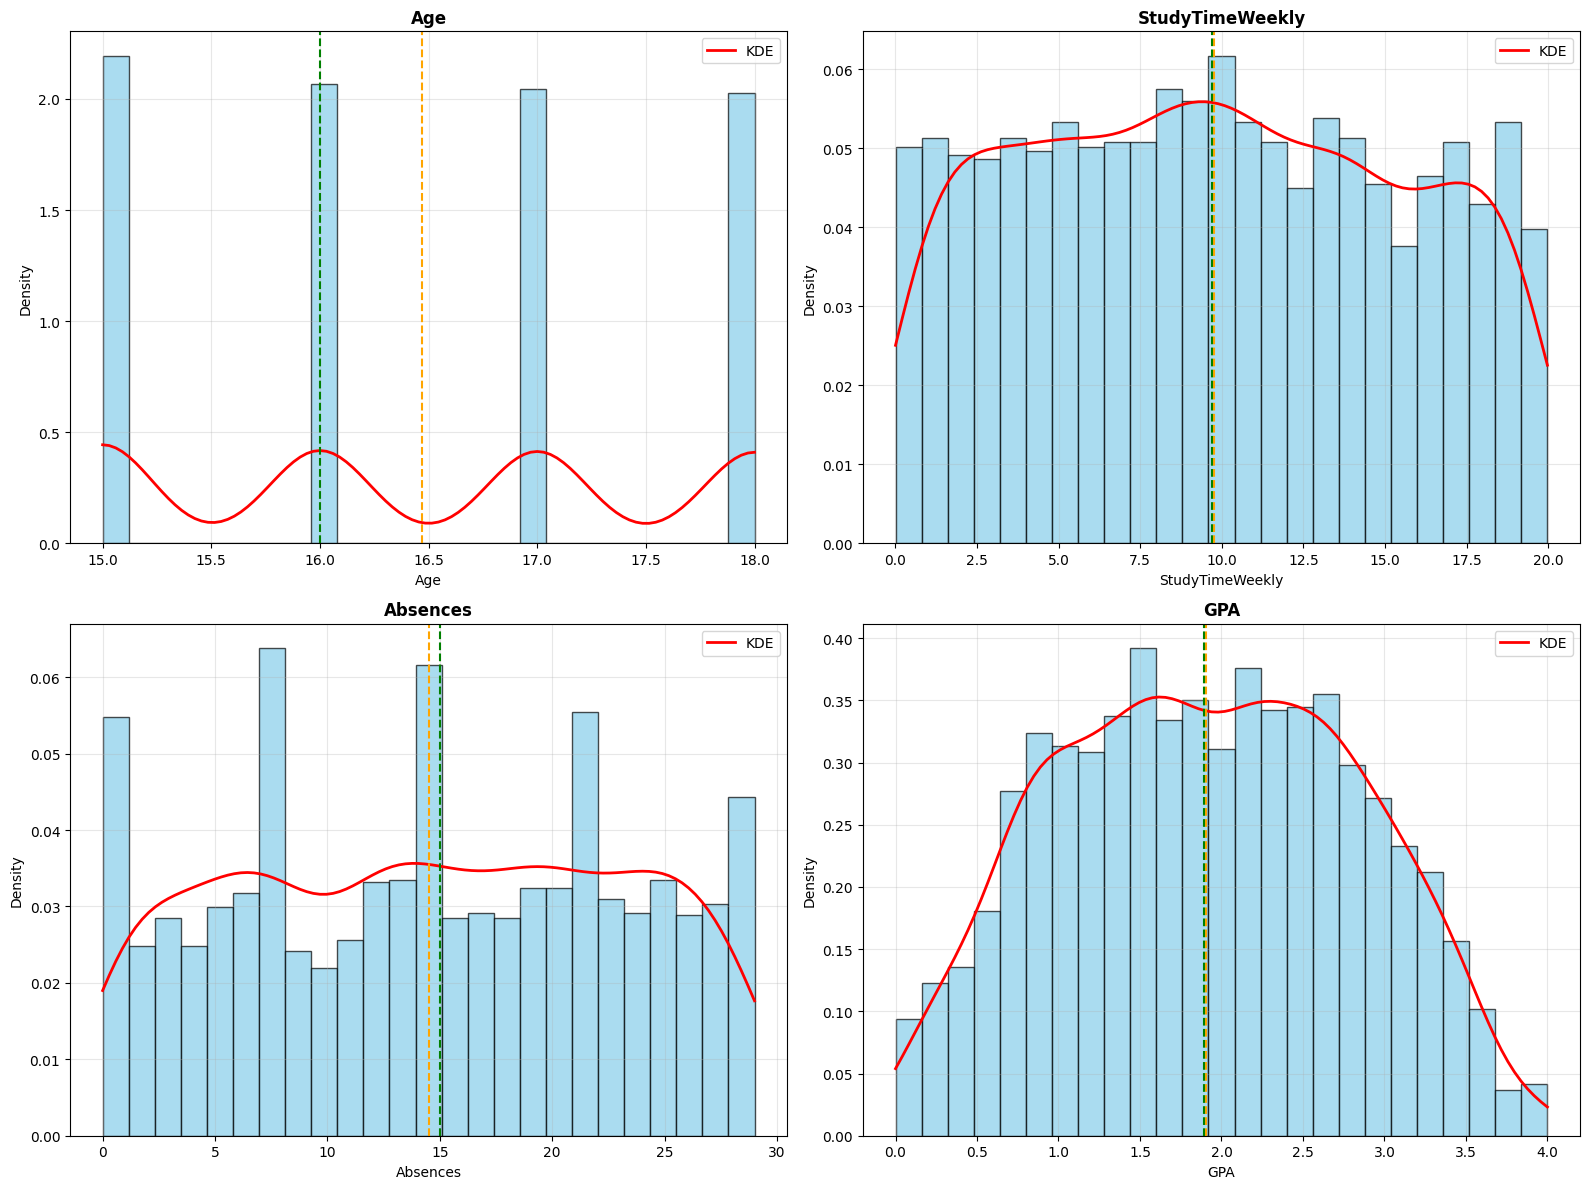

In [211]:
print("\n PERSEBARAN FITUR NUMERIK")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=25, alpha=0.7, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    kde = stats.gaussian_kde(df[feature])
    axes[i].plot(x, kde(x), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Stats
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

plt.tight_layout()
plt.show()

##### Outlier Detection


 BOXPLOT DETEKSI OUTLIER


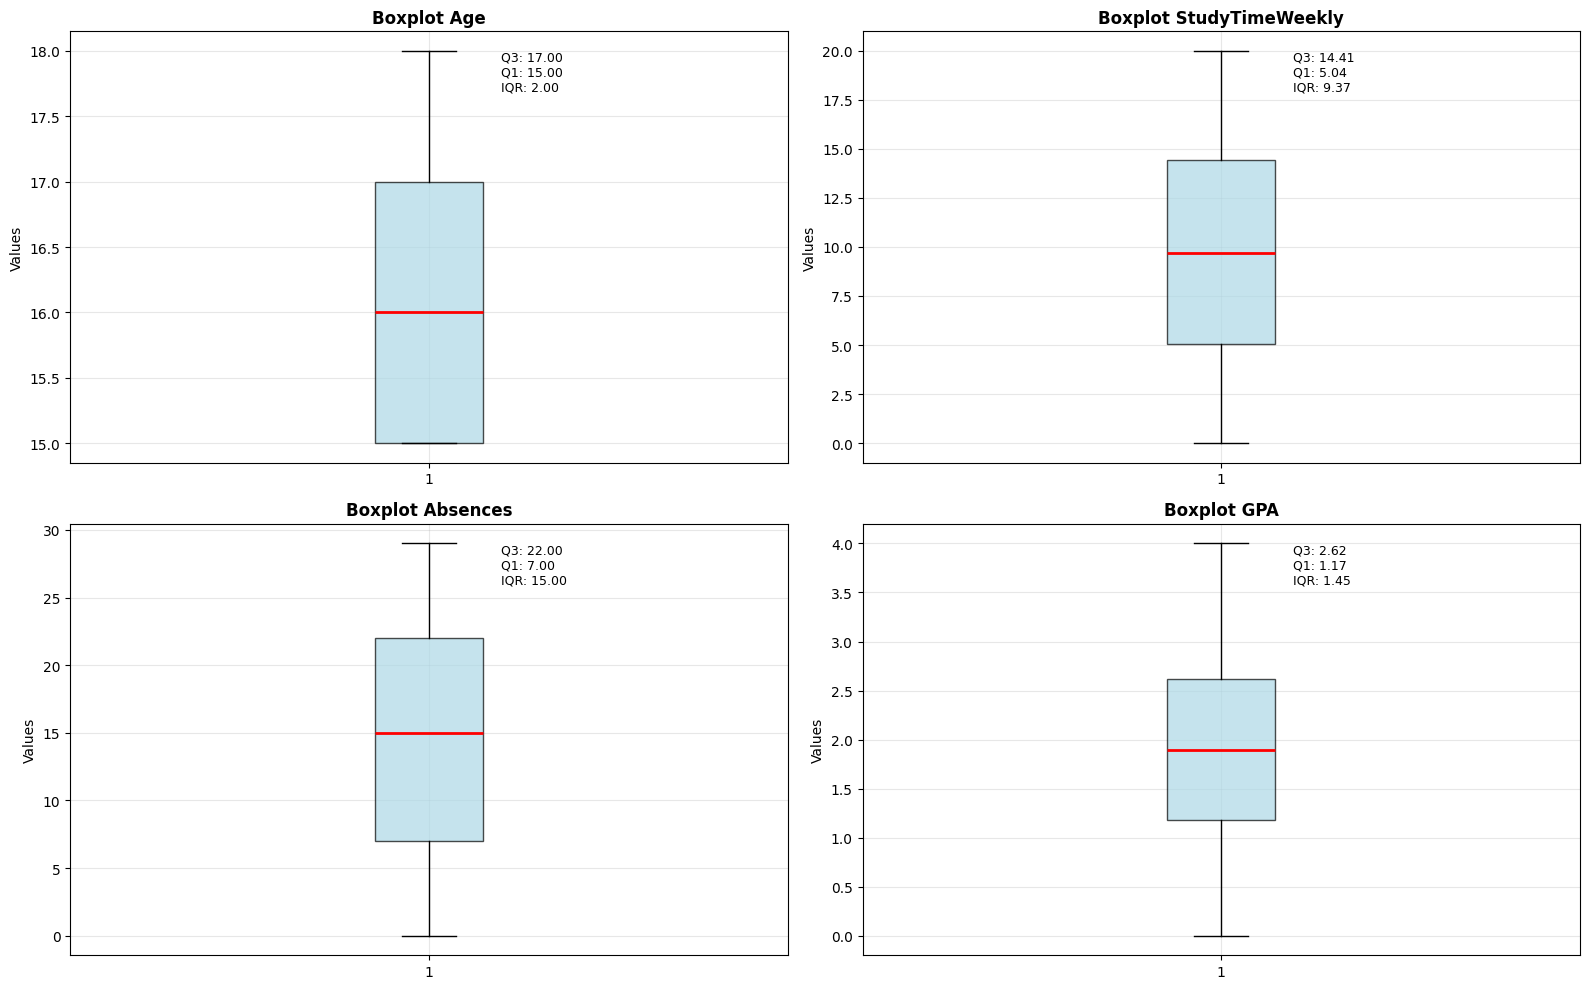

In [212]:
# Deteksi Outlier dengan boxplot
print("\n BOXPLOT DETEKSI OUTLIER")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Boxplot
    box_plot = axes[i].boxplot(df[feature], patch_artist=True, 
                              boxprops=dict(facecolor='lightblue', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'Boxplot {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Values')
    axes[i].grid(True, alpha=0.3)
    
    # Tambahkan statistik pada plot
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[i].text(1.1, df[feature].max(), f'Q3: {Q3:.2f}\nQ1: {Q1:.2f}\nIQR: {IQR:.2f}', 
                verticalalignment='top', fontsize=9)

plt.tight_layout()
plt.show()

In [213]:
# Deteksi outlier dengan IQR 
print("\n DETEKSI OUTLIER MENGGUNAKAN IQR")
print("=" * 50)


for feature in numerical_features:
    print(f"\n {feature.upper()}")
    print("-" * 30)
    
    # Hitung quartile dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    
    print(f"Q1 (25th percentile): {Q1:.3f}")
    print(f"Q3 (75th percentile): {Q3:.3f}")
    print(f"IQR                 : {IQR:.3f}")
    print(f"Lower Bound         : {lower_bound:.3f}")
    print(f"Upper Bound         : {upper_bound:.3f}")
    print(f"Outlier Count       : {outlier_count}")
    print(f"Outlier Percentage  : {outlier_percentage:.2f}%")
    
    if outlier_count > 0:
        print(f"Outlier Range       : {outliers[feature].min():.3f} to {outliers[feature].max():.3f}")


 DETEKSI OUTLIER MENGGUNAKAN IQR

 AGE
------------------------------
Q1 (25th percentile): 15.000
Q3 (75th percentile): 17.000
IQR                 : 2.000
Lower Bound         : 12.000
Upper Bound         : 20.000
Outlier Count       : 0
Outlier Percentage  : 0.00%

 STUDYTIMEWEEKLY
------------------------------
Q1 (25th percentile): 5.043
Q3 (75th percentile): 14.408
IQR                 : 9.365
Lower Bound         : -9.005
Upper Bound         : 28.456
Outlier Count       : 0
Outlier Percentage  : 0.00%

 ABSENCES
------------------------------
Q1 (25th percentile): 7.000
Q3 (75th percentile): 22.000
IQR                 : 15.000
Lower Bound         : -15.500
Upper Bound         : 44.500
Outlier Count       : 0
Outlier Percentage  : 0.00%

 GPA
------------------------------
Q1 (25th percentile): 1.175
Q3 (75th percentile): 2.622
IQR                 : 1.447
Lower Bound         : -0.996
Upper Bound         : 4.793
Outlier Count       : 0
Outlier Percentage  : 0.00%


##### Fitur vs Target


 HISTOGRAM FITUR NUMERIK BERDASARKAN GRADECLASS


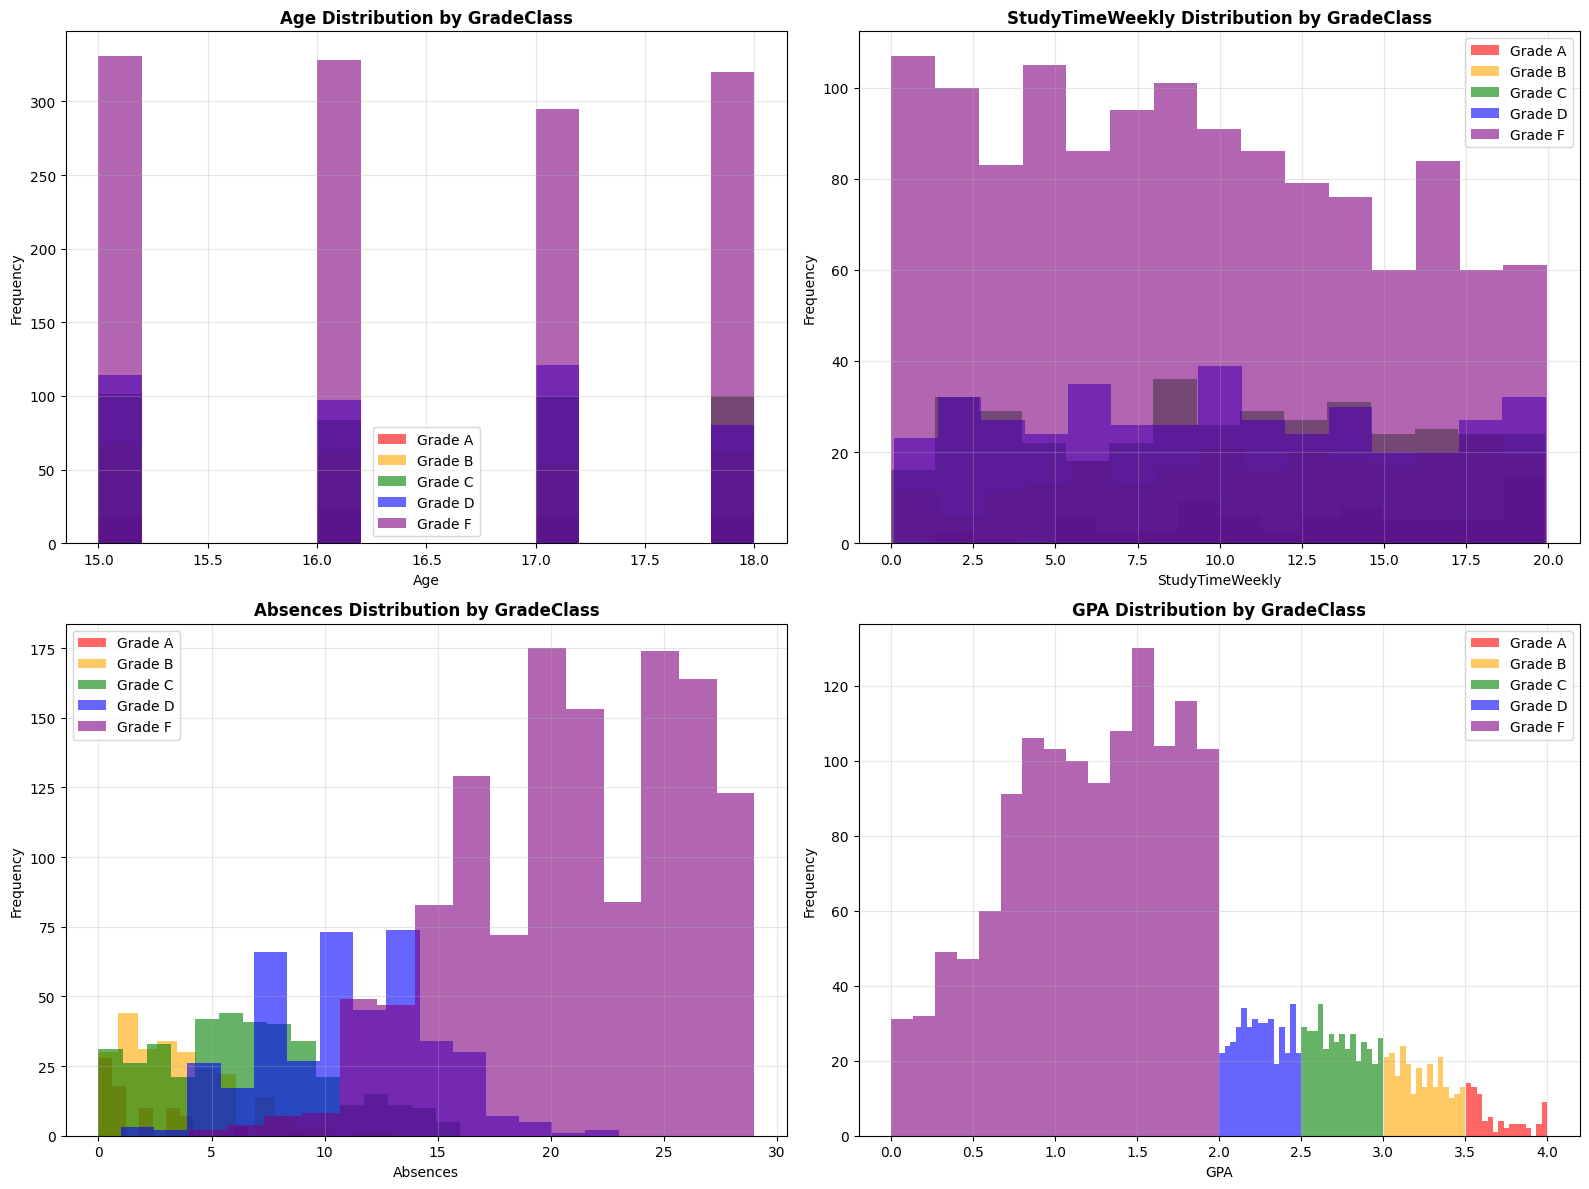

In [214]:
print(f"\n HISTOGRAM FITUR NUMERIK BERDASARKAN GRADECLASS")
print("=" * 55)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

grades = df['GradeClass'].unique()
colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, feature in enumerate(numerical_features):
    for j, grade in enumerate(sorted(grades)):
        grade_data = df[df['GradeClass'] == grade][feature]
        axes[i].hist(grade_data, alpha=0.6, label=f'Grade {grade}', 
                    bins=15, color=colors[j])
    
    axes[i].set_title(f'{feature} Distribution by GradeClass', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### Korelasi

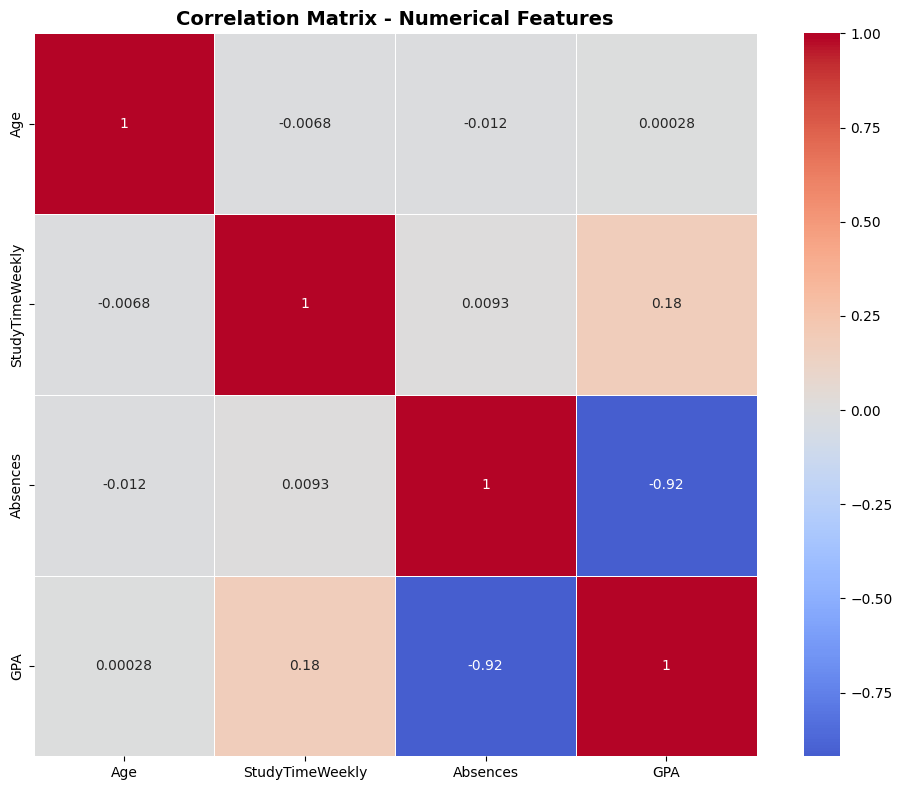

In [215]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### FITUR KATEGORIK

##### Distribusi

In [216]:
print("\n=== FITUR KATEGORIK ===")
df[categorical_features].describe().T


=== FITUR KATEGORIK ===


,count,unique,top,freq
Gender,2392,2,Female,1222
Ethnicity,2392,4,Caucasian,1207
ParentalEducation,2149,4,Some College,934
ParentalSupport,2180,4,Moderate,740
Tutoring,2392,2,No,1671
Extracurricular,2392,2,No,1475
Sports,2392,2,No,1666
Music,2392,2,No,1921
Volunteering,2392,2,No,2016
GradeClass,2392,5,F,1274



 PERSEBARAN FITUR KATEGORIKAL


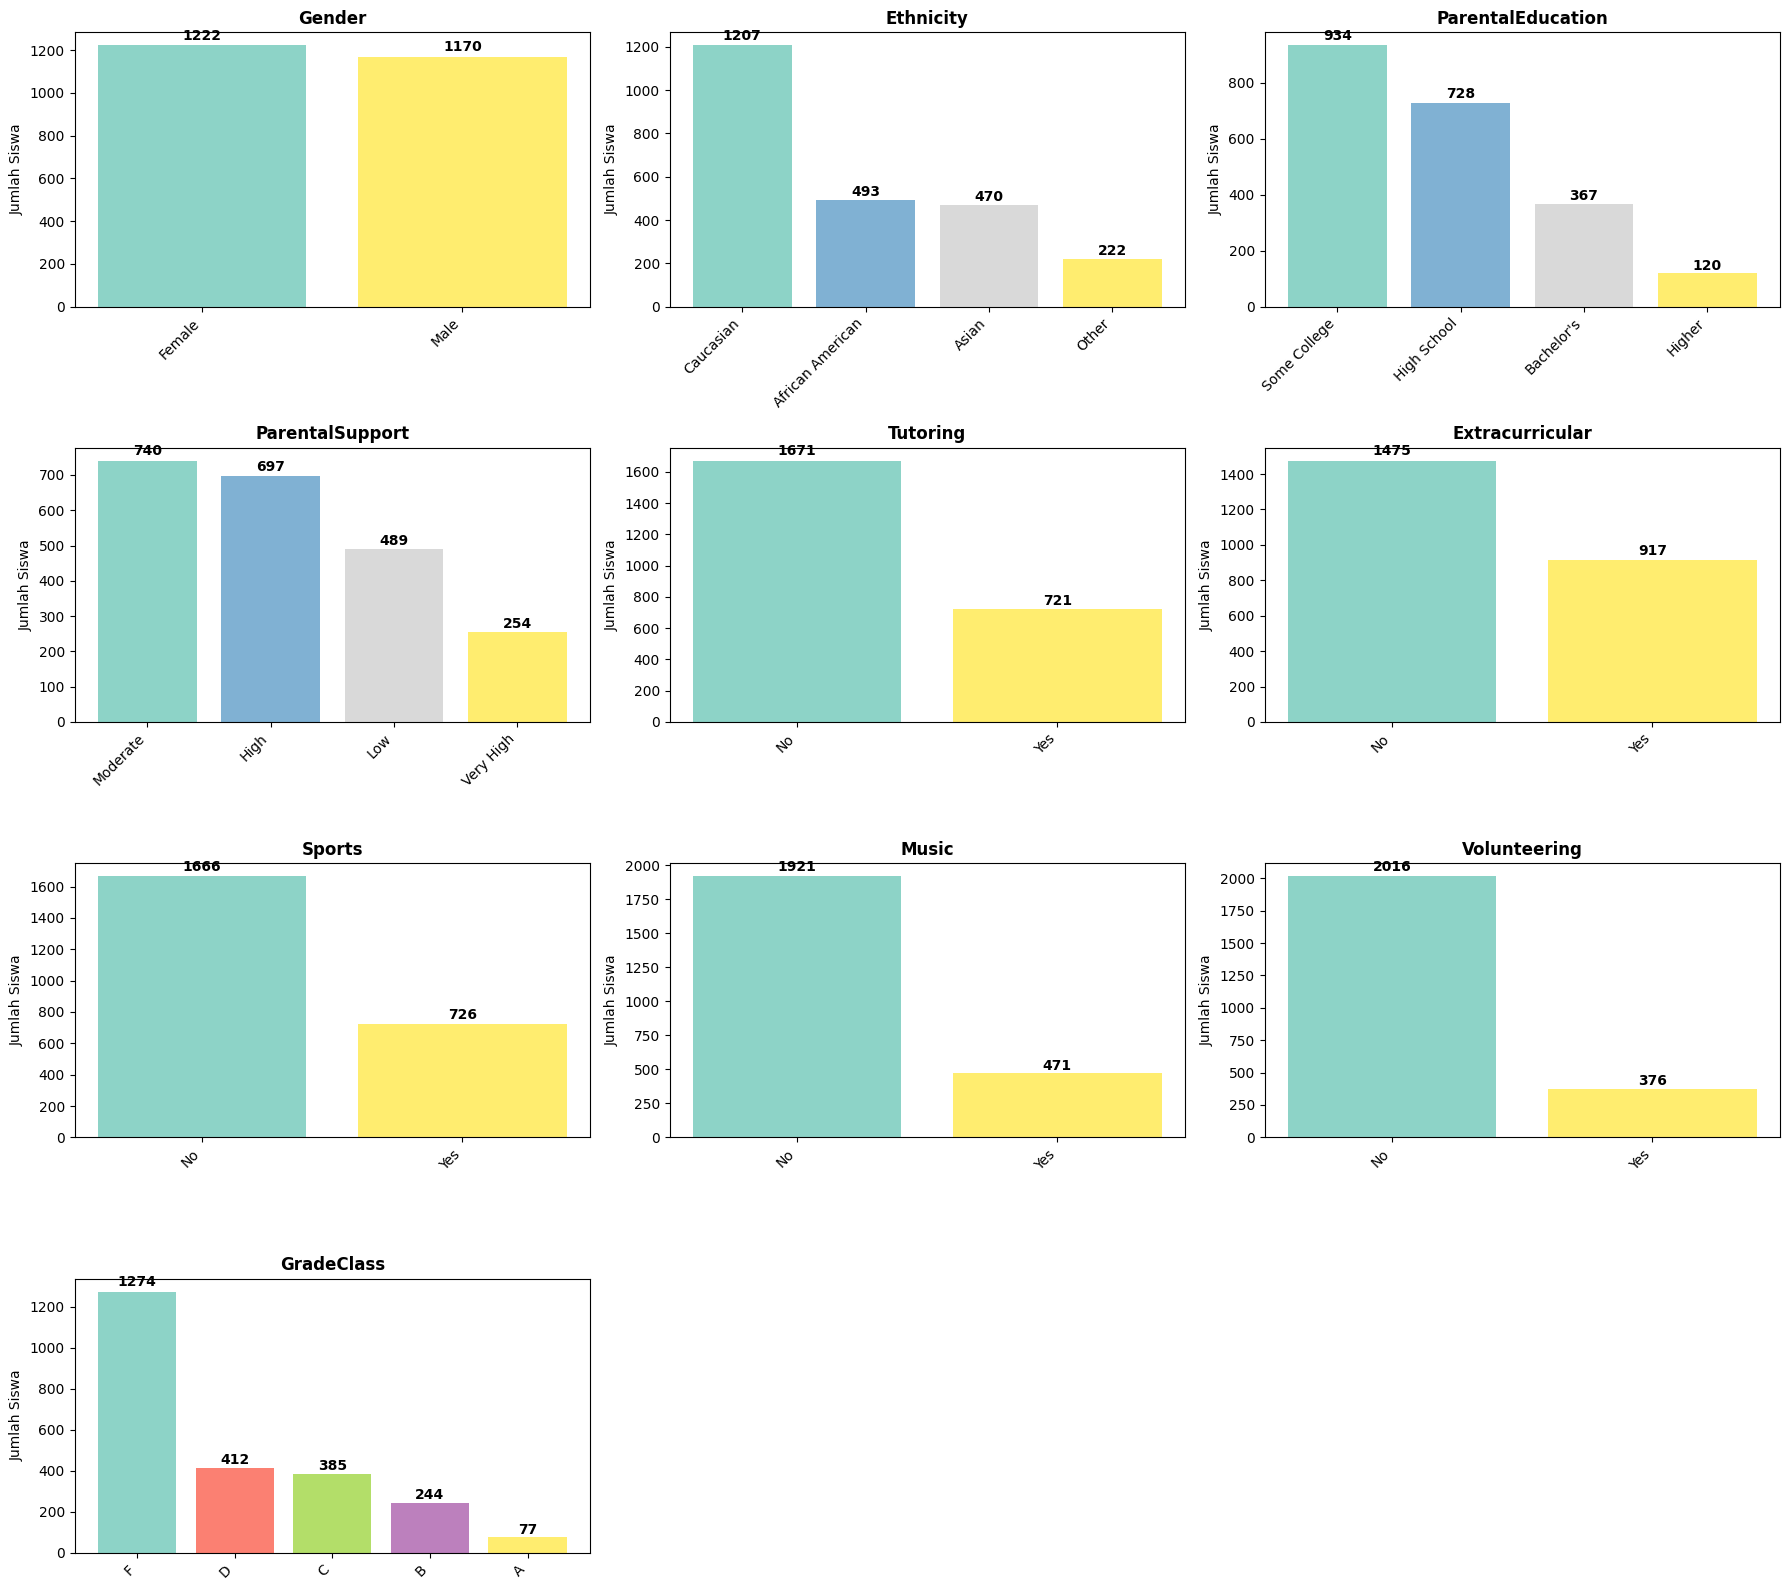

In [217]:
print("\n PERSEBARAN FITUR KATEGORIKAL")
print("=" * 40)

n_categorical = len(categorical_features)
n_cols = 3
n_rows = (n_categorical + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    
    # Bar plot
    bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                      color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Jumlah Siswa')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    

    # Menambahkan nilai diatas bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Hapus subplot kosong 
for i in range(n_categorical, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### Fitur vs Target


 VISUALISASI DISTRIBUSI


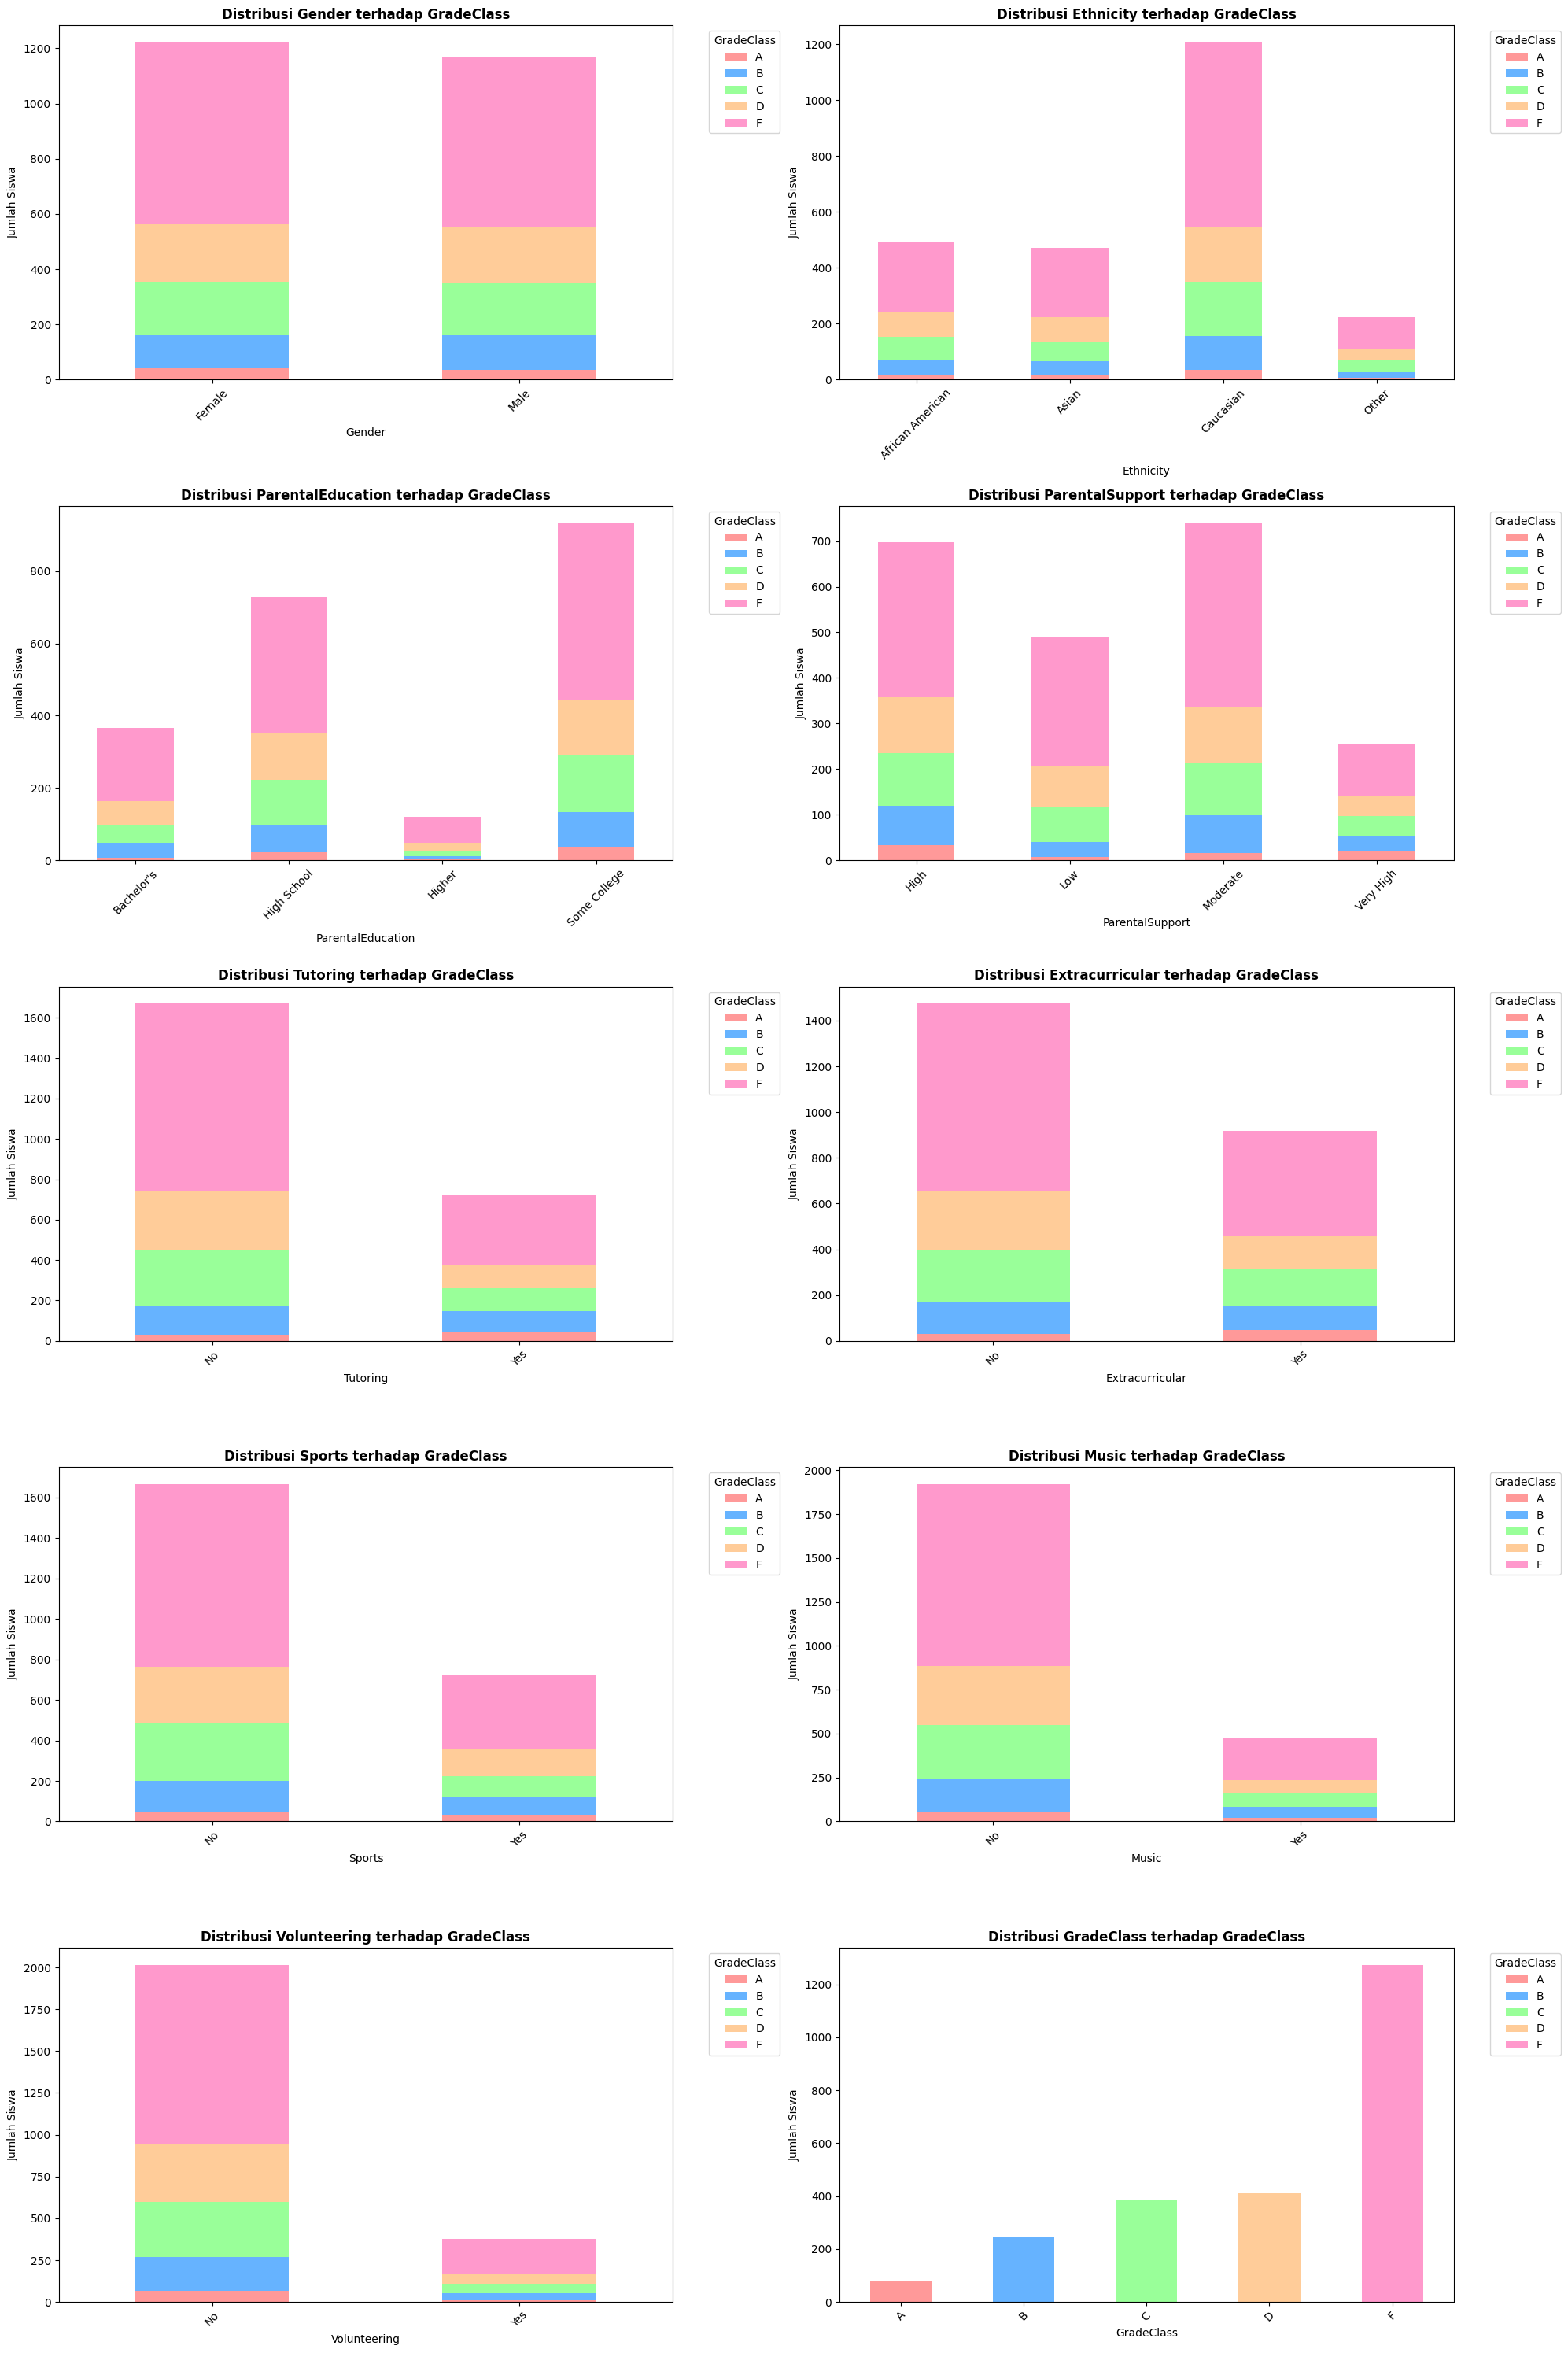

In [218]:
print(f"\n VISUALISASI DISTRIBUSI")
print("=" * 40)

n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Buat crosstab
    crosstab = pd.crosstab(df[feature], df['GradeClass'])
    
    # Stacked bar
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], 
                 color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
    
    axes[i].set_title(f'Distribusi {feature} terhadap GradeClass', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Jumlah Siswa')
    axes[i].legend(title='GradeClass', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


 VISUALISASI DISTRIBUSI PERSENTASE


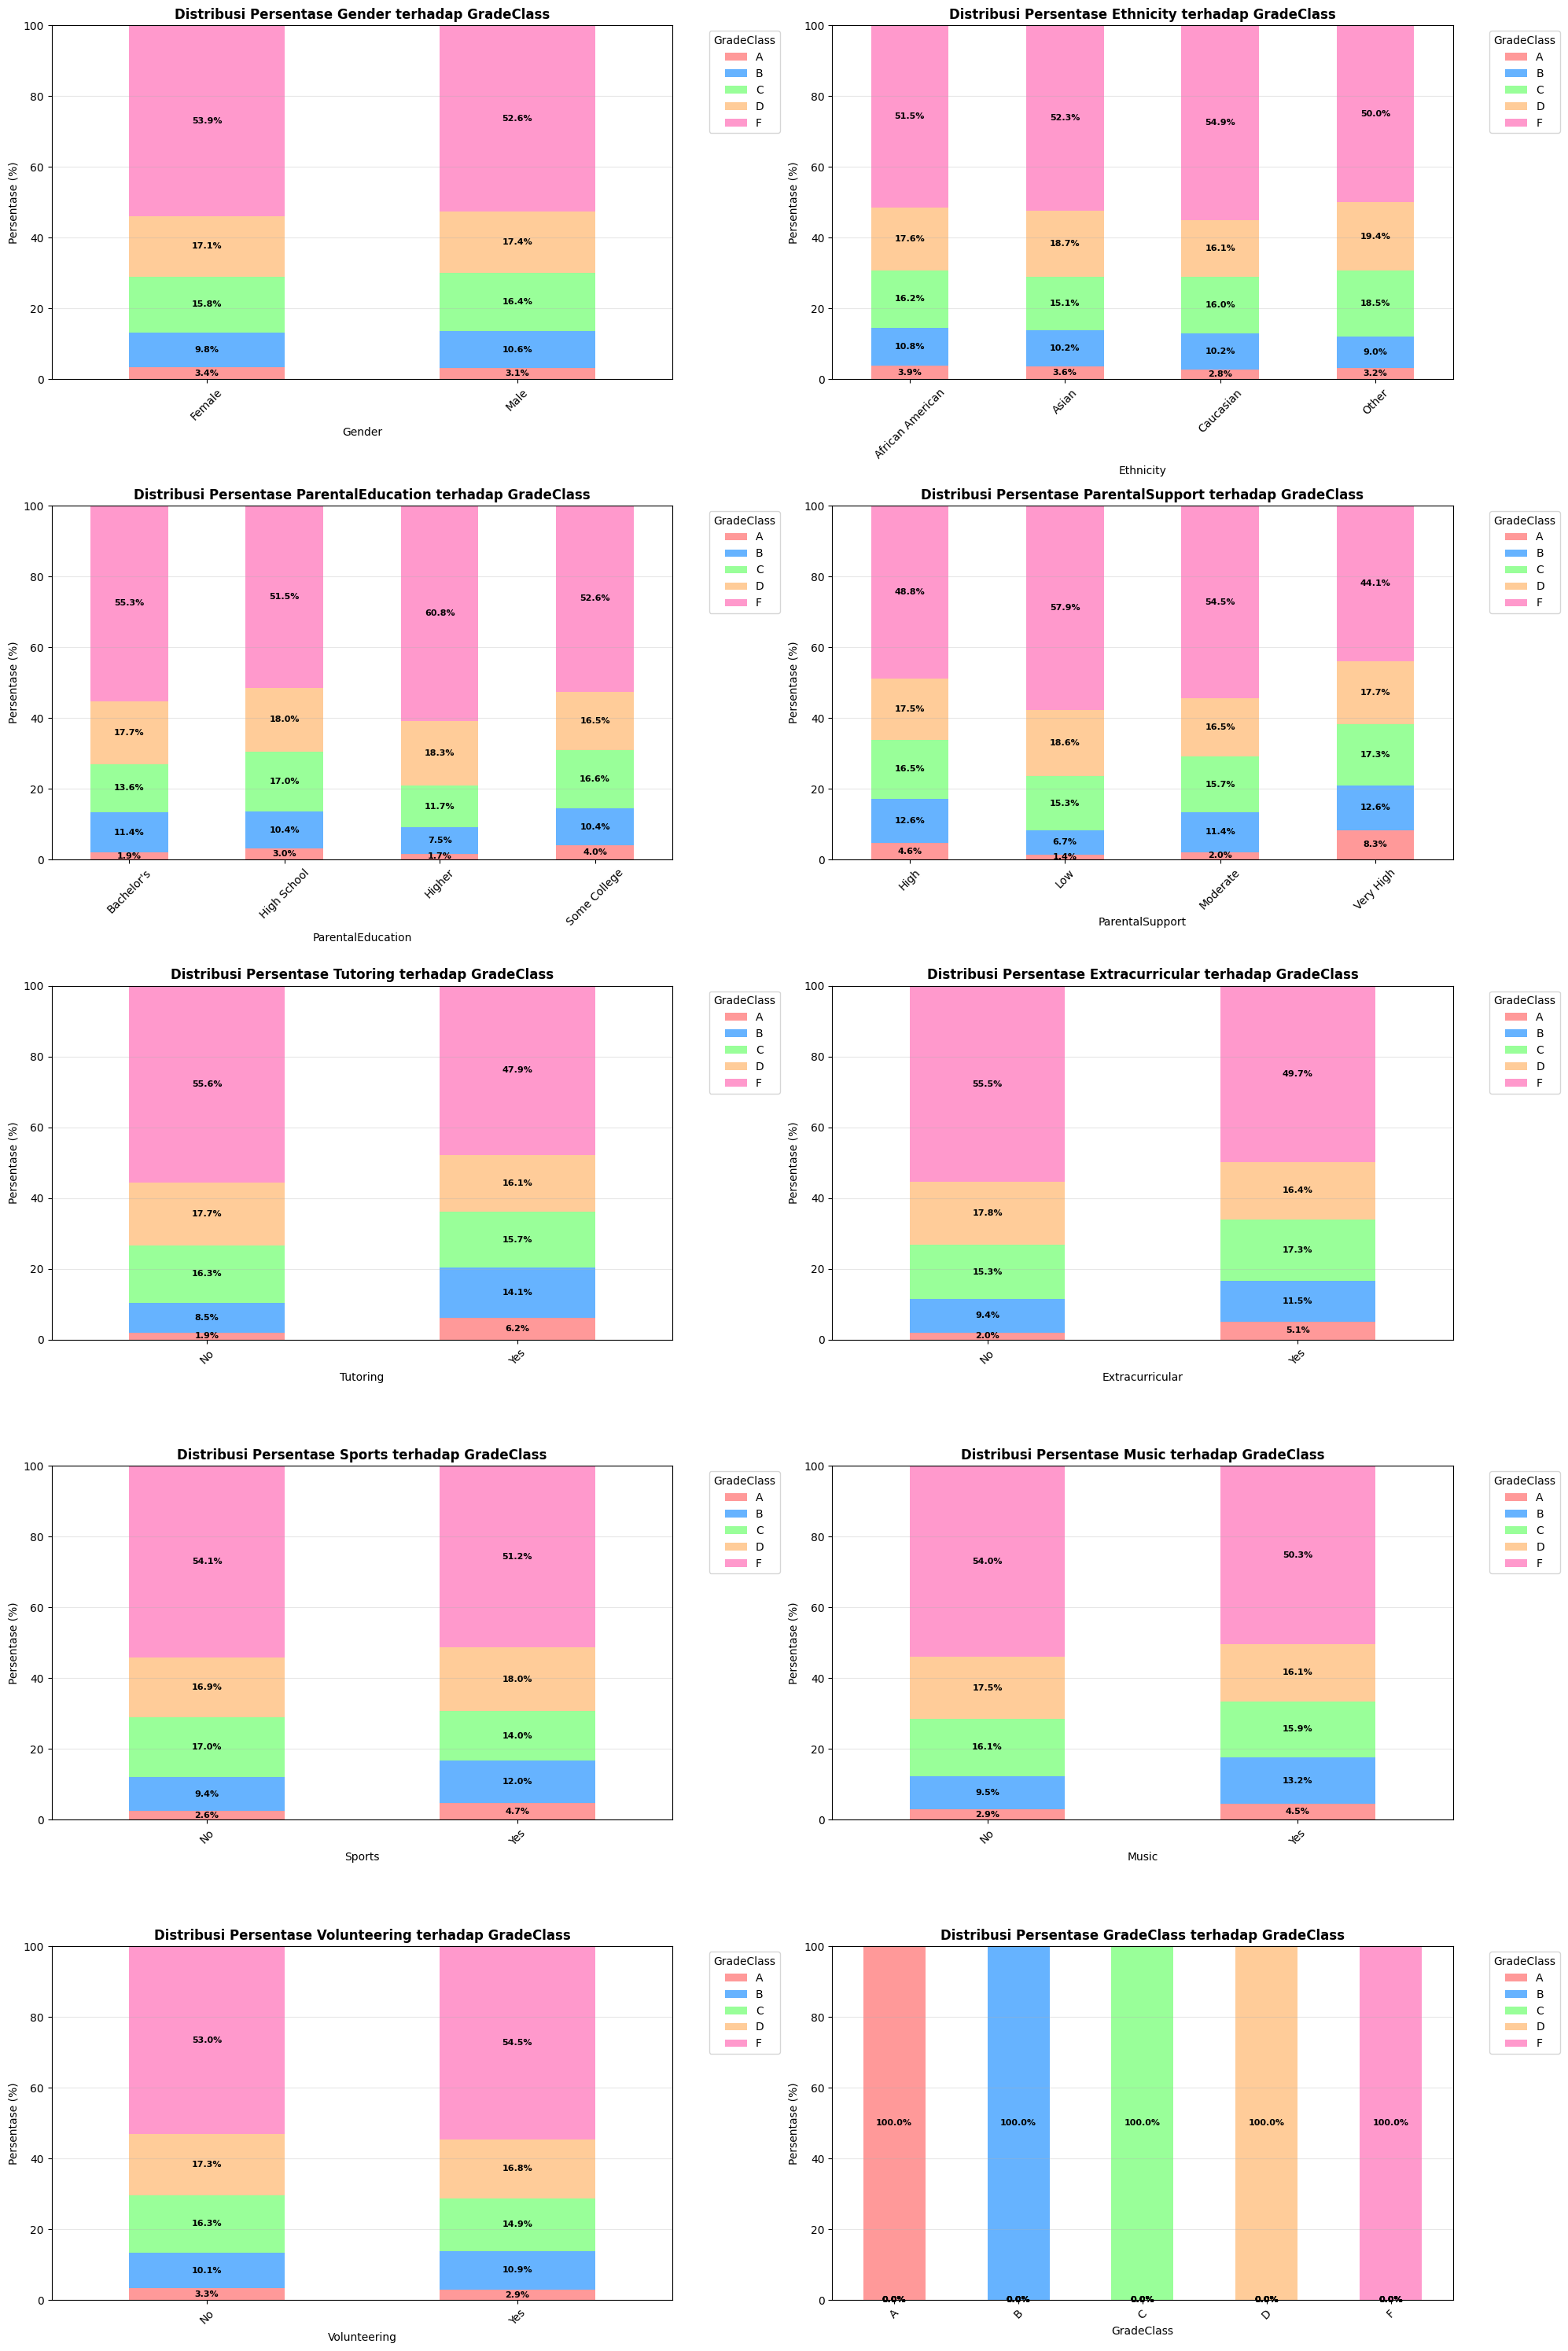

In [ ]:
print(f"\n VISUALISASI DISTRIBUSI PERSENTASE")
print("=" * 45)

n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Buat crosstab dengan normalisasi (per kategori feature)
    crosstab_pct = pd.crosstab(df[feature], df['GradeClass'], normalize='index') * 100
    
    # Stacked bar dengan persentase
    crosstab_pct.plot(kind='bar', stacked=True, ax=axes[i], 
                     color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
    
    axes[i].set_title(f'Distribusi Persentase {feature} terhadap GradeClass', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Persentase (%)')
    axes[i].legend(title='GradeClass', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 100)

    axes[i].grid(True, alpha=0.3, axis='y')

    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', label_type='center', 
                         fontsize=8, fontweight='bold')

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### CHI Squared Test


 CHI-SQUARE TEST


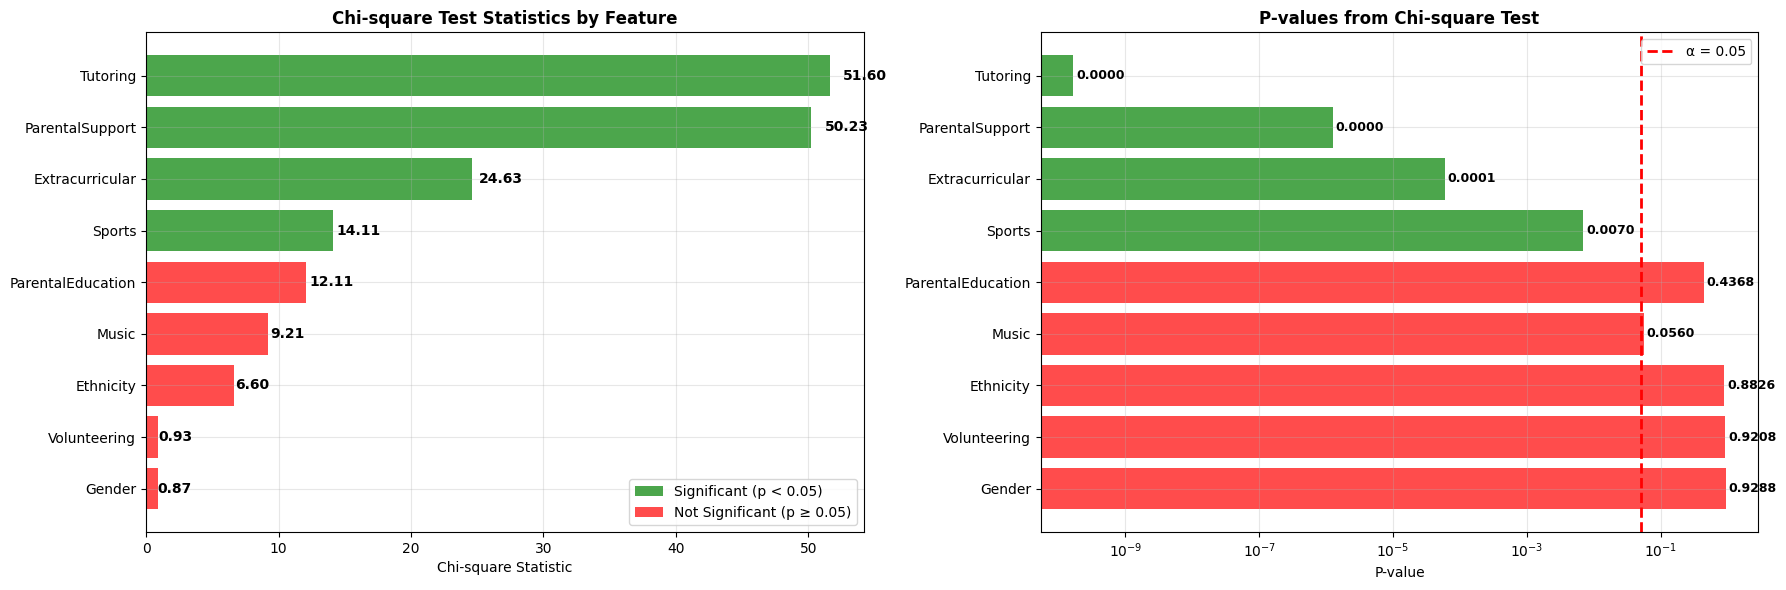

In [219]:
print("\n CHI-SQUARE TEST")
print("=" * 65)

categorical_features_clean = [col for col in categorical_features if col != 'GradeClass']

chi_square_results = {}

for feature in categorical_features_clean:
    contingency_table = pd.crosstab(df[feature], df['GradeClass'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    chi_square_results[feature] = {
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof,
        'significant': p_value < 0.05
    }

chi_df = pd.DataFrame(chi_square_results).T
chi_df = chi_df.sort_values('chi2', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot chi-square values
colors = ['red' if not sig else 'green' for sig in chi_df['significant']]
bars1 = ax1.barh(chi_df.index, chi_df['chi2'], color=colors, alpha=0.7)
ax1.set_xlabel('Chi-square Statistic')
ax1.set_title('Chi-square Test Statistics by Feature', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

for i, (bar, value) in enumerate(zip(bars1, chi_df['chi2'])):
    ax1.text(value + value*0.02, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f}', va='center', ha='left', fontweight='bold')

# Bar plot p-values dengan log scale
bars2 = ax2.barh(chi_df.index, chi_df['p_value'], color=colors, alpha=0.7)
ax2.set_xlabel('P-value')
ax2.set_title('P-values from Chi-square Test', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax2.grid(True, alpha=0.3)
ax2.legend()

for i, (bar, value) in enumerate(zip(bars2, chi_df['p_value'])):
    ax2.text(value + value*0.1, bar.get_y() + bar.get_height()/2, 
             f'{value:.4f}', va='center', ha='left', fontweight='bold', fontsize=9)

legend_elements = [Patch(facecolor='green', alpha=0.7, label='Significant (p < 0.05)'),
                  Patch(facecolor='red', alpha=0.7, label='Not Significant (p ≥ 0.05)')]
ax1.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

## Null Values

<Axes: >

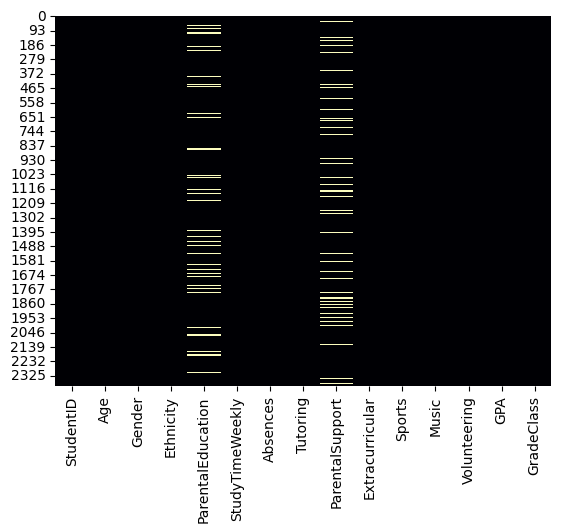

In [220]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

## Data Preprocessing

#### Data Cleaning

In [241]:
cols_with_missing = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        cols_with_missing.append(col)

# Untuk setiap kolom dengan missing values
for col in cols_with_missing:
    print(f"\n{'='*60}")
    print(f" ANALISIS MISSING VALUES: {col.upper()}")
    print(f"{'='*60}")
    
    # Hitung missing values
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    
    print(f"Total missing: {missing_count} ({missing_pct:.2f}%)")
    
    if missing_count > 0:

        missing_indicator = df[col].isnull().astype(int)
        
        # Test terhadap semua kolom lain
        other_cols = [c for c in df.columns if c != col and c != 'StudentID']
        significant_relationships = []
        
        print(f"\n CHI-SQUARED TEST missing rows terhadap semua kolom:")
        print("-" * 50)
        
        for test_col in other_cols:
            try:
                
                if df[test_col].isnull().sum() > 0:
                    # Gunakan hanya baris yang tidak missing di test_col
                    mask = ~df[test_col].isnull()
                    test_missing = missing_indicator[mask]
                    test_values = df[test_col][mask]
                else:
                    test_missing = missing_indicator
                    test_values = df[test_col]
                
                # Untuk kolom numerik, buat bins
                if test_col in ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']:
                    test_values_binned = pd.cut(test_values, bins=5, duplicates='drop')
                    crosstab = pd.crosstab(test_missing, test_values_binned)
                else:
                    crosstab = pd.crosstab(test_missing, test_values)
                
                # Chi-square test
                if crosstab.shape[0] > 1 and crosstab.shape[1] > 1:
                    chi2, p_value, dof, expected = chi2_contingency(crosstab)
                    
                    status = " SIGNIFIKAN" if p_value < 0.05 else " Non-signifikan"
                    print(f"{test_col:20s}: χ²={chi2:8.4f}, p={p_value:.4f} {status}")
                    
                    if p_value < 0.05:
                        significant_relationships.append({
                            'column': test_col,
                            'chi2': chi2,
                            'p_value': p_value,
                            'crosstab': crosstab
                        })
                
            except Exception as e:
                print(f"{test_col:20s}: Error - {str(e)}")
        
        
        # Visualisasi untuk kolom target (GradeClass)
        if 'GradeClass' in [r['column'] for r in significant_relationships]:
            print(f"\n VISUALISASI MISSING vs GRADECLASS:")
            gradeclass_rel = next(r for r in significant_relationships if r['column'] == 'GradeClass')
            crosstab_grade = gradeclass_rel['crosstab']
            
            # Hitung persentase missing per grade
            crosstab_pct = pd.crosstab(missing_indicator, df['GradeClass'], normalize='columns') * 100
            missing_by_grade = crosstab_pct.iloc[1] if 1 in crosstab_pct.index else crosstab_pct.iloc[0]
            
            print("   Persentase missing per grade:")
            for grade in sorted(missing_by_grade.index):
                print(f"   Grade {grade}: {missing_by_grade[grade]:5.1f}%")



 ANALISIS MISSING VALUES: PARENTALEDUCATION
Total missing: 243 (10.16%)

 CHI-SQUARED TEST missing rows terhadap semua kolom:
--------------------------------------------------
Age                 : χ²=  3.2371, p=0.3565  Non-signifikan
Gender              : χ²=  0.2431, p=0.6220  Non-signifikan
Ethnicity           : χ²=  3.3640, p=0.3388  Non-signifikan
StudyTimeWeekly     : χ²=  4.9644, p=0.2910  Non-signifikan
Absences            : χ²=  5.9169, p=0.2054  Non-signifikan
Tutoring            : χ²=  0.1106, p=0.7395  Non-signifikan
ParentalSupport     : χ²=  2.8143, p=0.4212  Non-signifikan
Extracurricular     : χ²=  1.4521, p=0.2282  Non-signifikan
Sports              : χ²=  0.0000, p=1.0000  Non-signifikan
Music               : χ²=  3.7304, p=0.0534  Non-signifikan
Volunteering        : χ²=  0.0168, p=0.8968  Non-signifikan
GPA                 : χ²=  2.5570, p=0.6345  Non-signifikan
GradeClass          : χ²=  1.6126, p=0.8065  Non-signifikan

 ANALISIS MISSING VALUES: PARENTALSUPPORT